In [1]:
from tensorflow.keras.models import load_model

# H5 파일에서 모델 로드
model = load_model('conv_net_v1.h5')


In [2]:
import pandas as pd

label_0 = pd.read_csv("data/label_0_data.csv")
label_1 = pd.read_csv("data/label_1b_data.csv")
label_2 = pd.read_csv("data/label_2_data.csv")
label_3 = pd.read_csv("data/label_3_data.csv")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def multiple_plotting():
    # 파일 경로, 이름 설정해주세요.
    data1_df = pd.read_csv('data/label_0_data.csv', header=None)
    data2_df = pd.read_csv('data/label_1b_data.csv', header=None)
    data3_df = pd.read_csv('data/label_2_data.csv', header=None)
    data4_df = pd.read_csv('data/label_3_data.csv', header=None)

    data1_df.columns = ['x', 'y', 'z']
    data2_df.columns = ['x', 'y', 'z']
    data3_df.columns = ['x', 'y', 'z']
    data4_df.columns = ['x', 'y', 'z']


    vector_value1 = np.sqrt(data1_df['x']** 2 + data1_df['y']**2 + data1_df['z']**2)
    vector_value2 = np.sqrt(data2_df['x']** 2 + data2_df['y']**2 + data2_df['z']**2)
    vector_value3 = np.sqrt(data3_df['x']** 2 + data3_df['y']**2 + data3_df['z']**2)
    vector_value4 = np.sqrt(data4_df['x']** 2 + data4_df['y']**2 + data4_df['z']**2)

    plt.figure(figsize=(20,20))
    fig, axes = plt.subplots(nrows=2, ncols=2)

    axes[0][0].plot(vector_value1)
    axes[0][1].plot(vector_value2)
    axes[1][0].plot(vector_value3)
    axes[1][1].plot(vector_value4)
    plt.show()

<Figure size 2000x2000 with 0 Axes>

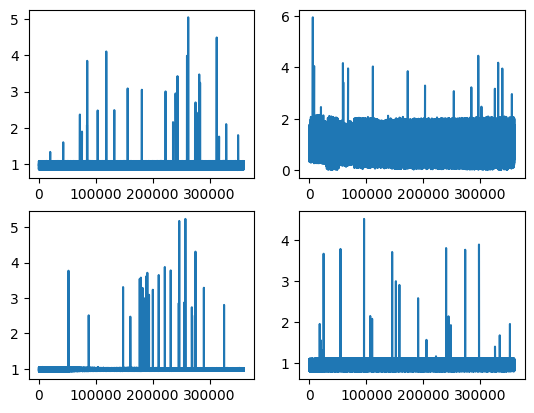

In [4]:
multiple_plotting()

In [5]:
len_0 = len(label_0)
len_1 = len(label_1)
len_2 = len(label_2)
len_3 = len(label_3)

label_X = [label_0, label_1, label_2, label_3]
rem = [len_0, len_1, len_2, len_3]

for i in range(4):
    r = rem[i] % 100
    label_X[i] = label_X[i].iloc[:rem[i] - r]

    print(len(label_X[i]))

data_split_0 = np.array_split(label_X[0], len(label_X[0]) // 100)
data_split_1 = np.array_split(label_X[1], len(label_X[1]) // 100)
data_split_2 = np.array_split(label_X[2], len(label_X[2]) // 100)
data_split_3 = np.array_split(label_X[3], len(label_X[3]) // 100)


y_label_0 = np.zeros(len(data_split_0))
y_label_1 = np.ones(len(data_split_1))
y_label_2 = np.full(len(data_split_2), 2)
y_label_3 = np.full(len(data_split_3), 3)

359900
359800
359900
359900


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
x_test = np.concatenate([data_split_0, data_split_1, data_split_2, data_split_3])
x_test

array([[[ 0.989293,  0.00706 ,  0.008017],
        [ 0.878125,  0.016363,  0.009689],
        [ 0.952647,  0.011712,  0.015421],
        ...,
        [ 1.033317,  0.010733,  0.008972],
        [ 1.035531,  0.008529,  0.006345],
        [ 0.959288,  0.014894,  0.00159 ]],

       [[ 0.970109,  0.010488,  0.006345],
        [ 1.019544,  0.008774,  0.011361],
        [ 1.003312,  0.011712,  0.001832],
        ...,
        [ 0.972077,  0.007795, -0.001557],
        [ 0.887963,  0.006815,  0.004912],
        [ 0.974044,  0.009998,  0.014943]],

       [[ 1.015855,  0.017588,  0.006345],
        [ 0.924363,  0.00755 ,  0.012555],
        [ 0.999623,  0.012446,  0.007301],
        ...,
        [ 1.003558,  0.008039,  0.012555],
        [ 1.003558,  0.008039,  0.012555],
        [ 1.00405 ,  0.007795,  0.006345]],

       ...,

       [[ 0.982407,  0.010243, -0.058443],
        [ 1.010198,  0.010977, -0.049244],
        [ 1.005525,  0.013915, -0.053843],
        ...,
        [ 0.823033,  0.013

In [ ]:
y_test_one_hot = to_categorical(y_test_concat, num_classes=4)